# On tuplets

The ratios of a subdivided timespan can be thought of as an integer composition.

Each positive integer $n$ has $2^{n−1}$ distinct compositions.

The sixteen compositions of 5 ( $ 2^{5-1} = 2^{4} = 16 $ ) are:
* 5
* 4 + 1
* 3 + 2
* 3 + 1 + 1
* 2 + 3
* 2 + 2 + 1
* 2 + 1 + 2
* 2 + 1 + 1 + 1
* 1 + 4
* 1 + 3 + 1
* 1 + 2 + 2
* 1 + 2 + 1 + 1
* 1 + 1 + 3
* 1 + 1 + 2 + 1
* 1 + 1 + 1 + 2
* 1 + 1 + 1 + 1 + 1

In order to make decisions about what ratios to employ in composing, we might categorize tuplets based on their prolation ratios (number of equal pulses to fit inside a timespan) or their subdivided timespan ratios.

Categories of tuplet prolation ratio:
* augmentation (compression)
    * superparticular ($a+1:a$)
* trivial ($1:1$)
* diminution (rarefaction)
    * superparticular ($a:a+1$)
    
    
Categories of timespan ratios:
* symmetric, 
* asymmetric
    * ordered
        * ascending
        * descending
    * unordered
        * left heavy
        * right heavy
        
When selecting from a large set of possibilities, we might filter that set based on certain characteristics:
* are all elements unique
* length
* 'symmetric'
* shape
    * '–'
    * '|'
    * '<'
    * '>'
    * '<>'
    * '><'

# Generating and notating tuplets algorithmically with Abjad

In [48]:
import random
from abjad import *
%load_ext abjad.ext.ipython
rnd = random.randint
choice = random.choice

The abjad.ext.ipython extension is already loaded. To reload it, use:
  %reload_ext abjad.ext.ipython


## Define specifiers, masks

In [49]:
beam_specifier = rhythmmakertools.BeamSpecifier(
    beam_each_division=True,
    beam_divisions_together=False,
    use_feather_beams=False,
)

In [50]:
duration_spelling_specifier = rhythmmakertools.DurationSpellingSpecifier(
    decrease_durations_monotonically=True,
    forbid_meter_rewriting=False,
    forbidden_written_duration=None,
    rewrite_meter=True,
    spell_metrically='unassignable'
)

In [51]:
tie_specifier = rhythmmakertools.TieSpecifier(
    strip_ties=False,
    tie_across_divisions=False,
    use_messiaen_style_ties=True,
)

In [52]:
tuplet_spelling_specifier = rhythmmakertools.TupletSpellingSpecifier(
    avoid_dots=True, 
    flatten_trivial_tuplets=True,
    is_diminution=True,
    simplify_tuplets=True,
    use_note_duration_bracket=False
)

In [53]:
silence_mask = rhythmmakertools.SilenceMask(
    indices=[1],
    period=5
)

In [54]:
sustain_mask = rhythmmakertools.SustainMask(
    indices=[2],
    period=5
)

## Some sequence-making helper functions

In [55]:
def ones(n):
    return [1] * n

In [56]:
def incised(n):
    if n==1:
        l = [1]
    elif n==2:
        l = [1,1]
    else:
        l = [1]
        l.append(n-3)
        l.append(1)
    return l

In [57]:
def superparticular_incised(n):
    if n == 1: return [1,1]
    if n == 2: return [1,1,1]
    else:
        l = [1]
        l.append(n-1)
        l.append(1)
        return l

In [58]:
def subparticular_incised(n):
    if n == 1: return [1]
    elif n == 2: return [1]
    elif n == 3: return [1,1]
    else:
        l = [1]
        l.append(n-3)
        l.append(1)
        return l

## Define the rhythm maker, make a rhythm

In [59]:
measures = [TimeSignature(x) for x in [(2,8),(3,8),(2,4),(5,8),(3,4)]]

In [60]:
durations = [mathtools.NonreducedFraction(measure).with_denominator(16) for measure in measures]

In [61]:
ratios = [superparticular_incised(d.numerator) for d in durations]

In [62]:
maker = rhythmmakertools.TupletRhythmMaker(
    tuplet_ratios=ratios,
    beam_specifier=beam_specifier,
    duration_spelling_specifier=duration_spelling_specifier,
    output_masks=[silence_mask, sustain_mask],
    preferred_denominator=None,
    tie_specifier=tie_specifier,
    tuplet_spelling_specifier=tuplet_spelling_specifier,
)

In [63]:
music = maker(measures)

In [64]:
staff = Staff()

In [65]:
for chunk,ts in zip(music,measures):
    measure = Measure(ts, chunk)
    staff.append(measure)

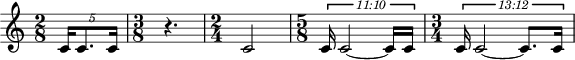

In [67]:
show(staff)